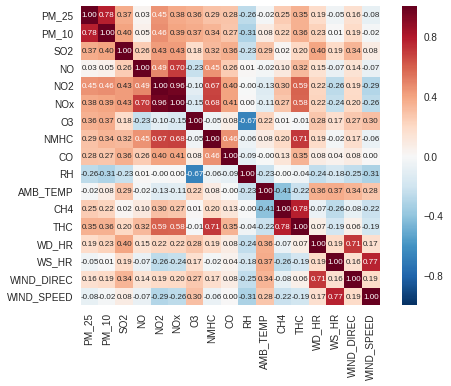

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

def dataproce(data,S):
    D = data[data["測項"]==S]
    D = D.drop(['日期','測站','測項'],axis = 1)
    D = np.array(D,float)
    D = np.reshape(D,(len(D)*len(D[0])))
    return D
    

data = pd.read_csv("train.csv",encoding = "big5")

#data.index=list(data["測項"])
#data = data.drop(['日期','測站','測項'],axis = 1)
#data = data.transpose()
#print(data)



#WD_HR = data[data["測項"]=="WD_HR"]
SO2 = dataproce(data,"SO2")
CO = dataproce(data,"CO")
NMHC = dataproce(data,"NMHC")
NO = dataproce(data,"NO")
NO2 = dataproce(data,"NO2")
NOx = dataproce(data,"NOx")
O3 = dataproce(data,"O3")
PM_25= dataproce(data,"PM2.5")
PM_10 = dataproce(data,"PM10")
RH = dataproce(data,"RH")
AMB_TEMP = dataproce(data,"AMB_TEMP")
CH4 = dataproce(data,"CH4")
THC = dataproce(data,"THC")
WD_HR = dataproce(data,"WD_HR")
WS_HR = dataproce(data,"WS_HR")
WIND_DIREC =  dataproce(data,"WIND_DIREC")
WIND_SPEED = dataproce(data,"WIND_SPEED")
#RAINFALL = dataproce(data,"RAINFALL")

#print(PM_25)
#print(PM_10)
Data = [PM_25,PM_10,SO2,NO,NO2,NOx,O3,NMHC,CO,RH,AMB_TEMP,CH4,THC,WD_HR,WS_HR,WIND_DIREC,WIND_SPEED]
cols = ['PM_25',"PM_10","SO2","NO","NO2","NOx","O3","NMHC","CO","RH","AMB_TEMP","CH4","THC","WD_HR","WS_HR","WIND_DIREC","WIND_SPEED"]
Data = np.transpose(Data)
Fdata = pd.DataFrame(Data,columns = [cols])
#print(Fdata)

#sns.set(style = 'whitegrid',context = 'notebook')


#sns.pairplot(Fdata[cols])
#plt.show()


cm = np.corrcoef(Fdata[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,cbar = True,annot=True,square = True,fmt = '.2f',annot_kws = {'size':8},yticklabels = cols,xticklabels = cols)

plt.savefig('heatmap.png',dpi = 300,format = 'png')
plt.show()

In [22]:
WD_HR =WD_HR.drop(['日期','測站','測項'],axis = 1)
SO2 = SO2.drop(['日期','測站','測項'],axis = 1)
CO = CO.drop(['日期','測站','測項'],axis = 1)
NMHC = NMHC.drop(['日期','測站','測項'],axis = 1)
NO = NO.drop(['日期','測站','測項'],axis = 1)
NO2 = NO2.drop(['日期','測站','測項'],axis = 1)
NOx = NOx.drop(['日期','測站','測項'],axis = 1)
O3 = O3.drop(['日期','測站','測項'],axis = 1)
WIND_SPEED = WIND_SPEED.drop(['日期','測站','測項'],axis = 1)
PM_25=PM_25.drop(['日期','測站','測項'],axis = 1) #axis=1 denotes that we are referring to a column, not a row
PM_10 = PM_10.drop(['日期','測站','測項'],axis = 1)

WD_HR= np.array(WD_HR)
SO2 = np.array(SO2)
CO = np.array(CO)
NMHC = np.array(NMHC)
NO = np.array(NO)
NO2 = np.array(NO2)
NOx = np.array(NOx)
O3 = np.array(O3)
WIND_SPEED = np.array(WIND_SPEED)
PM_25 = np.array(PM_25)
PM_10 = np.array(PM_10)

datarow = len(PM_25)
datacol = len(PM_25[0])

wd_hr = np.reshape(WD_HR,(12,480))
so2 = np.reshape(SO2,(12,480))
co = np.reshape(CO,(12,480))
nmhc = np.reshape(NMHC,(12,480))
no = np.reshape(NO,(12,480))
no2 = np.reshape(NO2,(12,480))
nox = np.reshape(NOx,(12,480))
o3 = np.reshape(O3,(12,480))
wind_speed = np.reshape(WIND_SPEED,(12,480))
pm_25 = np.reshape(PM_25,(12,480))
pm_10 = np.reshape(PM_10,(12,480))
datarow2 = len(pm_25)
datacol2 = len(pm_25[0])

#data processing
DSpm_25 = np.zeros((datarow2,datacol2,10),float)
DSpm_10 = np.zeros((datarow2,datacol2,10),float)
DSwd_hr = np.zeros_like(DSpm_25,float)
DSso2 = np.zeros_like(DSpm_25,float)
DSco = np.zeros_like(DSpm_25,float)
DSnmhc = np.zeros_like(DSpm_25,float)
DSno = np.zeros_like(DSpm_25,float)
DSno2 = np.zeros_like(DSpm_25,float)
DSnox = np.zeros_like(DSpm_25,float)
DSo3 = np.zeros_like(DSpm_25,float)
DSwind_speed = np.zeros_like(DSpm_25,float)
for i in range(0,datarow2):
    for j in range(0,datacol2-9):
        for k in range(0,10):
            DSpm_25[i,j,k] = pm_25[i,j+k]
            DSpm_10[i,j,k] = pm_10[i,j+k]
            DSwd_hr[i,j,k] = wd_hr[i,j+k]
            DSso2[i,j,k] = so2[i,j+k]
            DSco[i,j,k] = co[i,j+k]
            DSnmhc[i,j,k] = nmhc[i,j+k]
            DSno[i,j,k] = no[i,j+k]
            DSno2[i,j,k] = no2[i,j+k]
            DSnox[i,j,k] = nox[i,j+k]
            DSo3[i,j,k] = o3[i,j+k]
            DSwind_speed = wind_speed[i,j+k]
# put data set in a 12*471*10 array:12 means month



In [23]:
def fscaling(V):
    F = (V-np.mean(V))/(np.max(V)-np.min(V))
    return F

In [125]:
Y = fscaling(np.array(pm_25[1,:],float))
X = fscaling(np.array(pm_10[1,:],float))
Z = fscaling(np.array(pm_10[1,:],float))
G = fscaling(np.array(wd_hr[1,:],float))


plt.scatter(X,Y)
#plt.scatter(Z,Y)
#plt.scatter(G,Y)
plt.ylabel('PM2.5')
plt.xlabel('')

#plt.show()

In [126]:
#plt.savefig('pm25_wd_hr.png',dpi = 300,format = 'png')
#plt.close

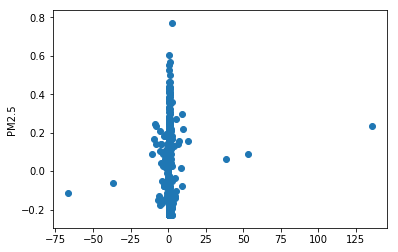

In [127]:
plt.show()